In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from naive_bayes import naive_bayes_train, naive_bayes_predict

In [3]:
"""
Read in all data
"""
train_labels = []
train_dataset = []

test_labels = []
test_dataset = []

with open("./dataset/train.csv", 'r') as train_data_file:
    reader = csv.reader(train_data_file)
    next(reader)
    for row in reader:
        train_labels.append(int(row[0]))
        train_dataset.append(row[1:])

with open("./dataset/test.csv", 'r') as test_data_file:
    reader = csv.reader(test_data_file)
    next(reader)
    for row in reader:
        test_labels.append(int(row[0]))
        test_dataset.append(row[1:])

In [4]:
"""
Normalize data to 0-1 and make them numpy arrays
"""
train_labels = np.array(train_labels)
train_data = np.array(train_dataset).astype(float)/255.0

test_labels = np.array(test_labels)
test_data = np.array(test_dataset).astype(float)/255.0

In [5]:
model = naive_bayes_train(train_data, train_labels)

0


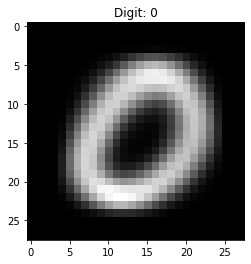

1


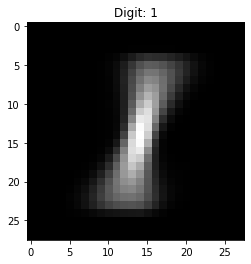

2


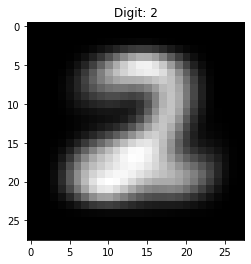

3


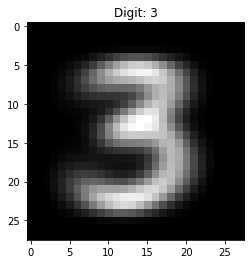

4


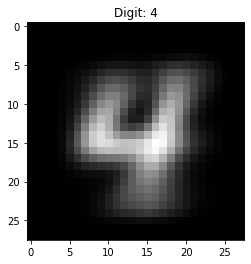

5


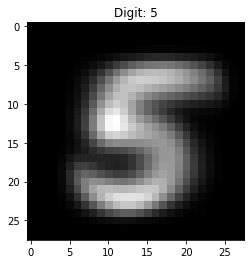

6


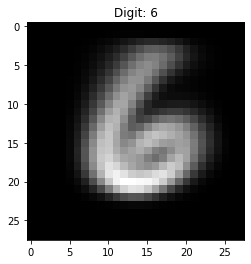

7


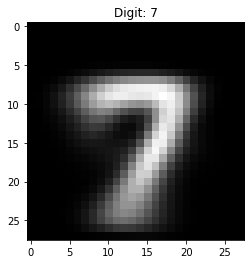

8


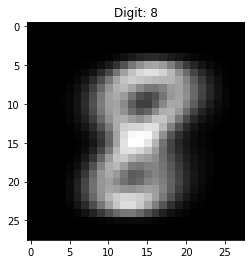

9


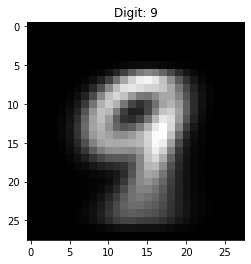

In [6]:
"""
These are the mean gaussian distributions after learning
"""
for digit, mean in model['gaussian_dist'].items():
    print(digit)
    pixels = mean['mean'].reshape(28,28)
    plt.title('Digit: {}'.format(digit))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [7]:
predictions = naive_bayes_predict(test_data, model)

In [8]:
score = np.mean(predictions == test_labels)

In [9]:
print("The overall accuracy of Naive Bayes on this dataset is: ",score)

The overall accuracy of Naive Bayes on this dataset is:  0.80725


In [10]:
"""
Calculate the scores for each digit
"""
digit_scores = []
for c in range(10):
    digit_score = np.mean(predictions[test_labels == c]==c)
    print("For digit {} Naive Bayes scored: {}".format(c, digit_score))
    digit_scores.append(int(digit_score*100))

For digit 0 Naive Bayes scored: 0.9025
For digit 1 Naive Bayes scored: 0.9641255605381166
For digit 2 Naive Bayes scored: 0.7651162790697674
For digit 3 Naive Bayes scored: 0.7594594594594595
For digit 4 Naive Bayes scored: 0.6709511568123393
For digit 5 Naive Bayes scored: 0.6015831134564644
For digit 6 Naive Bayes scored: 0.9152542372881356
For digit 7 Naive Bayes scored: 0.8215158924205379
For digit 8 Naive Bayes scored: 0.7597911227154047
For digit 9 Naive Bayes scored: 0.8766404199475065


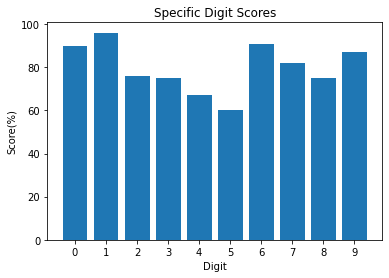

In [11]:
"""
Graph the scores for each digit
"""
plt.bar(range(10), digit_scores, width = 0.8)
plt.xlabel('Digit')
plt.ylabel('Score(%)')
plt.title('Specific Digit Scores')
plt.xticks(range(10))
plt.show()

In [12]:
"""
Look at the worst scored digits and what they were mistaken for
"""
four = predictions[test_labels == 4]
print(four)

[4 4 4 4 4 4 4 4 9 4 9 4 4 4 4 4 4 9 4 8 4 4 6 4 4 4 4 4 4 4 4 4 4 9 4 4 9
 8 9 4 9 4 9 4 4 9 4 9 4 9 4 4 4 4 9 4 9 4 4 5 4 9 9 4 9 4 4 9 4 4 4 6 4 4
 4 4 4 4 4 6 4 9 9 4 4 4 4 4 4 4 4 9 9 4 4 4 4 9 4 4 4 9 9 4 9 6 9 4 4 4 4
 4 0 4 4 4 4 2 4 4 9 4 5 4 4 4 4 6 9 9 4 4 9 4 9 4 9 4 4 4 4 4 4 4 4 4 4 9
 4 9 4 4 9 4 4 9 4 4 9 9 9 4 9 4 4 9 4 6 9 4 4 4 4 4 6 9 4 4 9 4 4 9 4 4 4
 9 9 4 8 4 4 9 4 4 4 9 4 4 9 4 8 4 4 4 4 4 4 9 4 9 4 9 8 4 9 4 4 4 4 4 4 4
 9 4 4 9 4 4 6 4 4 4 4 9 4 4 4 9 4 4 9 9 4 4 4 4 9 4 4 4 4 0 4 4 9 8 9 4 9
 9 4 4 4 4 4 4 4 4 4 4 9 4 4 9 7 4 4 9 4 4 9 4 5 4 4 4 4 9 4 4 4 4 4 9 4 9
 4 4 9 9 4 4 4 4 4 9 9 4 9 4 4 4 4 4 4 4 4 9 4 4 4 6 4 4 4 4 9 9 4 8 9 9 9
 4 4 4 4 9 4 4 6 9 9 9 4 4 8 9 4 9 9 9 4 8 4 4 4 9 2 9 4 4 9 4 4 9 9 4 4 4
 4 4 8 4 9 4 4 9 4 4 4 4 9 4 4 4 4 9 4]


In [13]:
five= predictions[test_labels == 5]
print(five)

[5 6 3 4 5 5 3 3 6 5 5 5 5 8 8 5 8 1 3 5 5 3 5 5 6 5 0 0 1 5 0 5 5 5 5 5 6
 2 8 3 3 5 5 5 5 5 0 5 8 5 5 5 5 8 5 5 5 5 6 5 1 5 5 9 5 3 5 5 5 0 1 5 5 3
 5 5 8 5 3 5 5 9 5 4 5 5 5 3 5 8 5 5 5 5 5 5 5 0 9 9 5 0 5 1 5 5 5 3 5 5 9
 5 6 5 5 3 5 5 1 5 9 5 9 5 5 5 5 5 8 8 3 5 5 5 8 5 5 5 5 5 1 5 8 5 5 5 5 3
 5 5 5 5 5 5 5 6 5 5 5 5 5 8 3 5 5 5 9 5 5 3 5 5 3 0 8 5 8 6 0 2 5 8 5 9 5
 5 5 5 6 9 5 9 5 5 5 5 5 5 5 5 5 5 3 8 5 5 5 3 3 5 5 5 8 5 5 5 5 3 5 9 5 9
 9 5 5 5 3 6 5 5 5 3 5 8 6 5 5 5 5 4 5 3 8 8 3 5 8 0 9 5 5 9 4 3 5 5 5 9 5
 9 6 8 1 5 5 5 5 5 3 3 9 5 8 5 8 5 9 4 5 3 5 0 5 0 9 5 5 4 5 8 3 3 3 5 8 5
 5 5 3 5 8 5 5 5 5 5 8 3 5 5 8 5 5 5 5 9 8 5 9 5 5 9 5 5 1 9 5 5 5 9 5 5 5
 5 3 5 5 3 8 5 5 5 5 3 5 5 6 5 0 5 8 5 5 5 9 6 5 5 3 5 3 8 3 5 9 5 5 5 5 8
 5 3 5 5 4 5 5 9 5]
